# Regularización y variabilidad

Esta es la solución a la tarea 4 referente a la [sección 5](https://felipegonzalez.github.io/aprendizaje-maquina-mcd-2022/05-regularizacion-1.html) de la notas

En este ejemplo hacemos **análisis de sentimiento**, intentanto predecir si reseñas de películas son positivas o negativas a partir del texto de las reseñas. En este ejemplo veremos un enfoque relativamente simple, que consiste en considerar solamente las palabras que contienen las reseñas, sin tomar en cuenta el orden (el modelo de bolsa de palabras o **bag of words**).

Usaremos regresión lineal, aunque este tipo de problema es mejor resolverlo usando algún método para variables binarias o categóricas (regresión logística por ejemplo)

## Feature Engineering Básico

Hay muchas maneras de preprocesar los datos para obtener variables numéricas a partir del texto. En este caso simplemente tomamos las palabras que ocurren más frecuentemente. 
* Encontramos las 3000 palabras más frecuentes sobre todos los textos, por ejemplo. Estas palabras son nuestro **vocabulario**.
* Registramos en qué documentos ocurre cada una de esas palabras.
* Cada palabra es una columna de nuestros datos, el valor es 1 si la palabra ocurre en documento y 0 si no ocurre.


Por ejemplo, para el texto "Un gato blanco, un gato negro", "un perro juega", "un astronauta juega" quedarían los datos:

|texto_id|un|gato|negro|blanco|perro|juega|
|-|-|-|-|-|-|-|
|texto_1|1|1|1|1|0|0|
|texto_2|1|0|0|0|1|1|
|texto_3|1|0|0|0|0|1|

Nótese que la palabra **astronauta** no está en nuestro vocabulario para este ejemplo.

Hay varias opciones para tener mejores variables, que pueden o no ayudar en este problema (no las exploramos en este ejercicio):
* Usar conteos de frecuencias de ocurrencia de palabras en cada documento, o usar log(1+ conteo), en lugar de 0-1's
* Usar palabras frecuentes, pero quitar las que son **stopwords**, como son preposiciones y artículos entre otras, pues no tienen significado: en inglés, por ejemplo, **so, is, then, the, a**, etc.
* Lematizar palabras: por ejemplo, contar en la misma categoría **movie** y **movies**, o **funny** y **funniest**, etc.
* Usar indicadores binarios si la palabra ocurre o no en lugar de la frecuencia
* Usar frecuencias ponderadas por qué tan rara es una palabra sobre todos los documentos (frecuencia inversa sobre documentos)
* Usar pares de palabras en lugar de palabras sueltas: por ejemplo: juntar "not" con la palabra que sigue (en lugar de usar **not** y **bad** por separado, juntar en una palabra **not_bad**),
* Usar técnicas de reducción de dimensionalidad que considera la co-ocurrencia de palabras (veremos más adelante en el curso).
* Muchas otras

## Clasificador de textos
Ahora hacemos regresión lineal con regularización ridge/lasso (aunque este es un problema que podríamos tratar mejor con regresión logística). La penalización es de la forma

$$\lambda((1-\alpha) \sum_j \beta_j^2 + \alpha \sum_j |\beta_j|)$$

de manera que combina ventajas de ridge (encoger juntos parámetros de variables correlacionadas) y lasso (eliminar variables que aportan poco a la predicción).

**Pregunta 1**: ¿Qué modelo se desempeña mejor? ¿Cuál está más sobreajustado? ¿Qué cosas podrías considerar para reducir el sesgo (piensa qué nuevas entradas podrías construir)?
<br>Se desempeña mejor el modelo con `mayor regularización`, lo cual es indicativo de un modelo más rígido comparado con el de menor regularización. Esto quiere decir que el modelo con baja regularización está más sobreajustado a los datos. Para reducir el sesgo se podría pensar en
* Utilizar otro tipo de modelo que no necesariamente sea una regresión lineal
* Incluir más palabras como entradas adicionales
* Utilizar combinaciones de palabras
* Usar otros esquemas además de la codificació binaria de tokens.

RMSE de los modelos:
* Baja regularización: $RMSE=0.4430$
* Mayor regularización: $RMSE=0.3961$

**Pregunta 2**: Obtén los coeficientes de los dos modelos que comparaste arriba. Compara los coeficientes más negativos y más positivos de cada modelo. ¿Cuáles tienen valores más grandes en valor absoluto? ¿Por qué? ¿Tiene sentido cuáles palabras tienen coeficiente positivo y cuáles negativo?

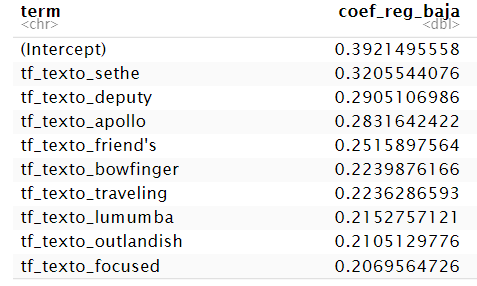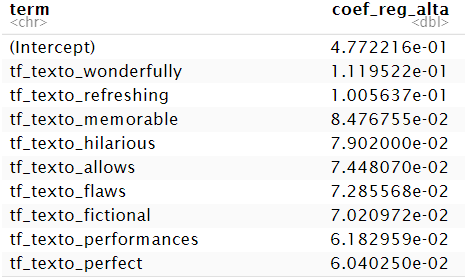

Los coeficientes de la regresión con baja regularización tienen valores absolutos más grandes. Esto se debe a que como tienen una menor penalización, es posible para el modelo incrementar más el valor de los coeficientes. En la mayoría de los casos, las palabras asociadas a los coeficiente negativos tienen sentido, esto debido a que en su mayoría son palabras que pudieran asociarse a sentimientos negativo.

**Pregunta 3**: Grafica coeficientes de un modelo contra los del otro modelo (agrega una recta y=x). ¿Cómo describes los patrones que ves en esa gŕafica?

**Pregunta 4**: (opcional) Clasifica a un texto como "positivo" cuando tenga una predicción digamos mayor a 0.7, y negativo cuando tiene una predicción menor a 0.3. ¿Qué tan bien coincide esta clasificación con las verdaderas etiquetas? ¿Qué tan bien coincide si clasificas como positiva una reseña cuando su predicción es mayor a 0.5?

In [1]:
import os
import numpy as np
import pandas as pd
import numpy as plt
import matplotlib.pyplot as plt

In [2]:
path_universal = "C:\\Users\\Miguel\\Documents\\Github\\itam-mcd"
os.listdir(path_universal)

['.git',
 'aprendizaje-automatico',
 'estadistica-computacional',
 'fundamentos-estadisticos',
 'mineria-analisis-datos',
 'optimizacion',
 'README.md']

In [3]:
path_asignatura = "aprendizaje-automatico"
path_asignatura = os.path.join(path_universal, path_asignatura)
os.listdir(path_asignatura)

['.ipynb_checkpoints', 'datos', 'libros']

In [4]:
#Se obtiene dataset original
file_path = "datos\\coefs_2mod.csv"
coefs = pd.read_csv(os.path.join(path_asignatura, file_path))
coefs.head()

,term,coef_reg_baja,coef_reg_alta
0,(Intercept),0.39215,0.477222
1,tf_texto_aaron,0.00000,0.000000
2,tf_texto_abandon,0.00000,0.000000
3,tf_texto_abandoned,0.00000,0.000000
4,tf_texto_abilities,0.00000,0.000000


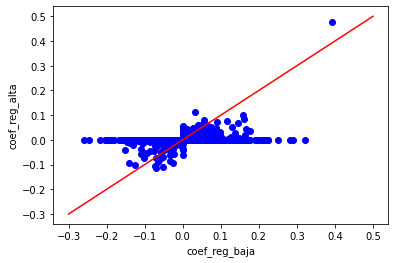

In [14]:
plt.scatter(x=coefs['coef_reg_baja'], y=coefs['coef_reg_alta'], c='b')
plt.plot(np.arange(-0.3,0.6,0.1), np.arange(-0.3,0.6,0.1), c='r')

plt.xlabel('coef_reg_baja')
plt.ylabel('coef_reg_alta')

plt.show()

Los coeficientes estan en los cuadrantes 1 y 3. Adicionalmente, varios de los coeficientes del modelo con penalización alta son cero, mientras que en el de menor regularización tienen valores negativos o positivos.

Responde las preguntas dada la siguiente gráfica:
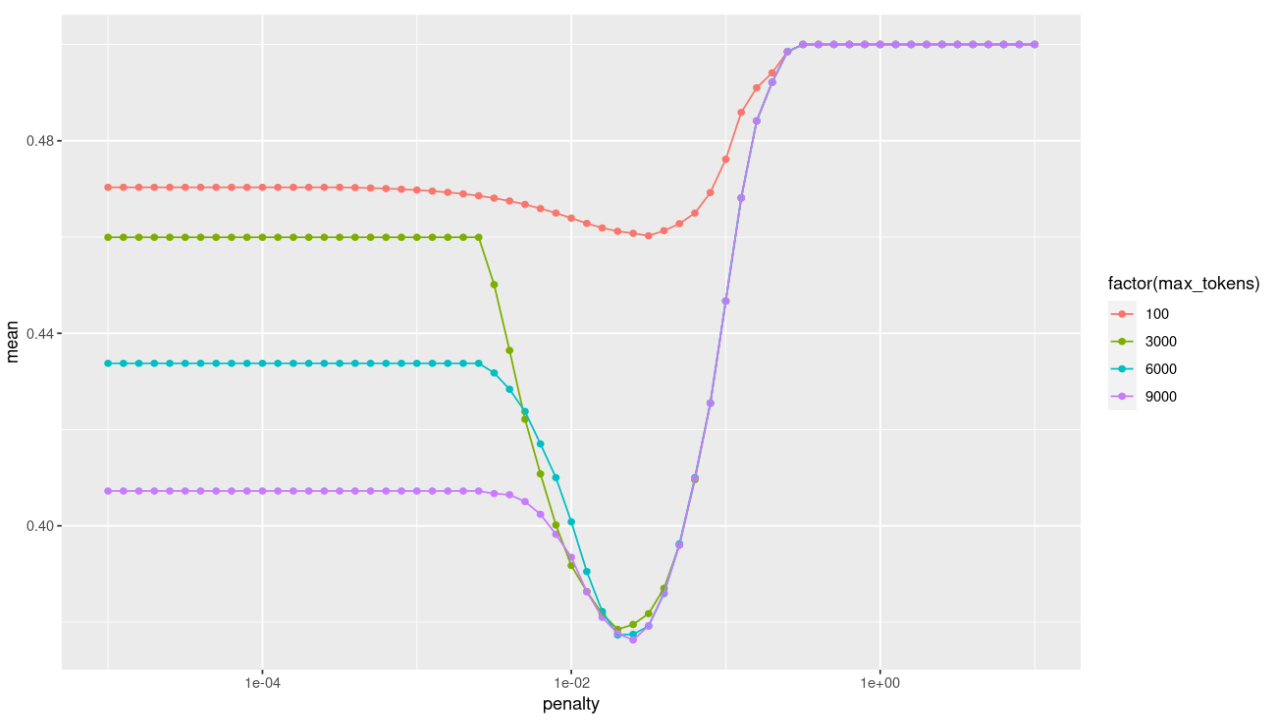

**Pregunta 4**: ¿Qué pasa con valores grandes de **penalty** (lambda)? ¿Por qué el valor del error no cambia para valores grandes? ¿Qué modelos son los seleccionados para valores grandes de lambda?
<br> Con valores grandes de $\lambda$ el modelo vuelve a subir su error, y el error para todos los `tokens` dados converge al mismo valor. Este valor no cambia debido a que altos valores de penalty van mandar los coeficientes del modelo a cero, y por ende resultar en una constante.

**Pregunta 5**: ¿Por qué el error de modelos con baja regularización es más grande que los modelos más regularizados? ¿Su problema es sesgo o por varianza?
<br> Porque los modelos con baja regularización, es decir, los modelos más flexibles, son los modelos que más fácilmente resultan en problemas de sobreajuste. Este es un problema por varianza de los modelos. Esto lo podemos notar en la parte izquierda de la gráfica, la zona más flexible, en donde a diferentes $n$'s de tokens, obtenemos errores muy diferentes entre sí para una $\lambda$ dada

**Pregunta 6**: Considera que el valor de **max_tokens** igual a 100 lo puedes descalificar. ¿Es por problemas de sesgo o varianza? ¿Por qué para valores grandes de regularización se desempeña igual que los otros modelos más grandes?
<br>Esto es por problemas de sesgo, sin embargo, es de notarse que a diferencia de los otros modelos, este no tiene una caída súbita en el error. Esto es debido a que el término de penalización en la ecuación de Ridge y Lasso es dependiente de los coeficientes del modelo. Este modelo tiene únicamente 100 coeficientes comparado con los demás, por lo que soporta altos valores de $\lambda$ antes de empezar a bajar el error.

Al final colnverge al mismo valor que los demás porque altos valores de penalty van mandar los coeficientes del modelo a cero, y por ende resultar en una constante.

**Pregunta 7**: Compara el número original de columnas y cuántas de ellas utiliza tu modelo. Examina los coeficientes de la tabla de arriba. ¿Ves algún patrón entre coeficientes positivos y negativos?
<br> Originalmente se tenían `9,000` columnas, al final el modelo utiliza únicamente `594` de ellas. Las palabras con coeficientes negativos se pueden asociar a sentimientos negativos; en contraste, las palabras con coeficientes positivos se pueden asociar con sentimientos positivos.